In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import h5py

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
X_data = h5py.File("/content/drive/MyDrive/Data/signs.h5") 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [70]:
list(X_data.keys())

['pictures']

In [71]:
X = np.array(X_data['pictures'])

In [72]:
X_r = X.reshape(X.shape[0],-1)

In [73]:
y = np.load('/content/drive/MyDrive/Data/labels_signs.npy') 

In [74]:
X_r.shape

(1200, 12288)

y =  5


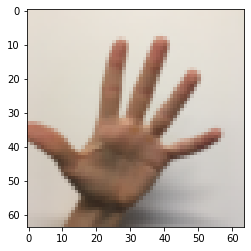

In [78]:
i = 112
plt.imshow(X[i])
print ("y = ",y[i])

In [79]:
y_c = to_categorical(y,6)

In [82]:
y[:5]

array([5, 0, 2, 5, 2])

In [81]:
y_c[:5]

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [83]:
y_c.shape

(1200, 6)

In [84]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_r,y_c,test_size=0.2,random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [85]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [86]:
model = Sequential()
model.add(Dense(25,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [87]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=200,verbose=0)
J_list = model.history.history['loss']

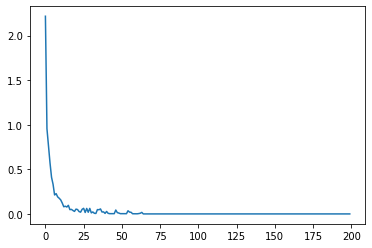

In [88]:
plt.plot(J_list)

In [89]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train, J_val, J_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.5682 - accuracy: 0.8667
[8.692343511640388e-10, 1.0] [1.7802518606185913, 0.875] [2.5681605339050293, 0.8666666746139526]


In [90]:
la = 0.01
model = Sequential()
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(12,activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(6,activation='softmax',kernel_regularizer=regularizers.l2(la)))

In [91]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=200,verbose=0)
J_list = model.history.history['loss']

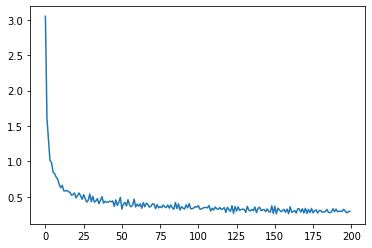

In [93]:
plt.plot(J_list)

In [94]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train, J_val, J_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.9000
[0.25216320157051086, 0.987500011920929] [0.49430879950523376, 0.9083333611488342] [0.5112757086753845, 0.8999999761581421]
